,X,y
0,-1.043159,-0.274317
1,-0.820856,-0.408213
2,0.665146,1.566284
3,1.822627,2.064461
4,-1.441583,-3.548152


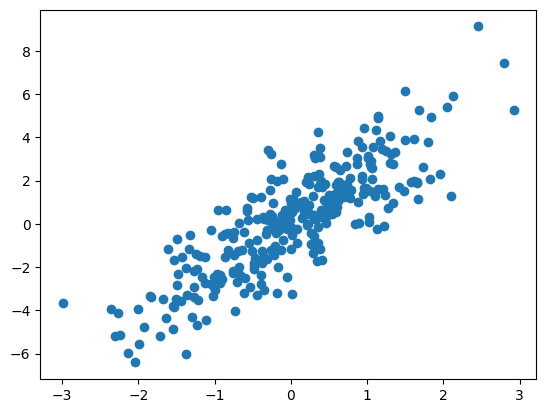

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


sample = 300
noise = np.random.randn(sample, 1) 
np.random.seed(49)
X = np.random.randn(sample, 1)
y = 2 * X + np.random.randn(sample, 1) + noise

plt.scatter(X, y)
datay = pd.DataFrame(y, columns=['y'])
datax = pd.DataFrame(X, columns=['X'])

concatenated_df = pd.concat([datax, datay], axis=1)
concatenated_df.head(5)

In [79]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, random_state=1, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)

rma = 0.5
model_linear = LinearRegression()
model_ridge = Ridge(alpha=rma)

cross_val = cross_val_score(model_linear, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
cross_val_ridge = cross_val_score(model_ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

model_linear = model_linear.fit(X_train, y_train)
model_ridge = model_ridge.fit(X_train, y_train)

y_pred_linear = model_linear.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

mse_val = np.mean(-cross_val)
mse_val_ridge = np.mean(-cross_val_ridge)

print(mse)
print(mse_val)
print('\n')
print(mse_ridge)
print(mse_val_ridge)

1.6986097787336227
1.8657093600772399


1.698359249129176
1.8657032250950323


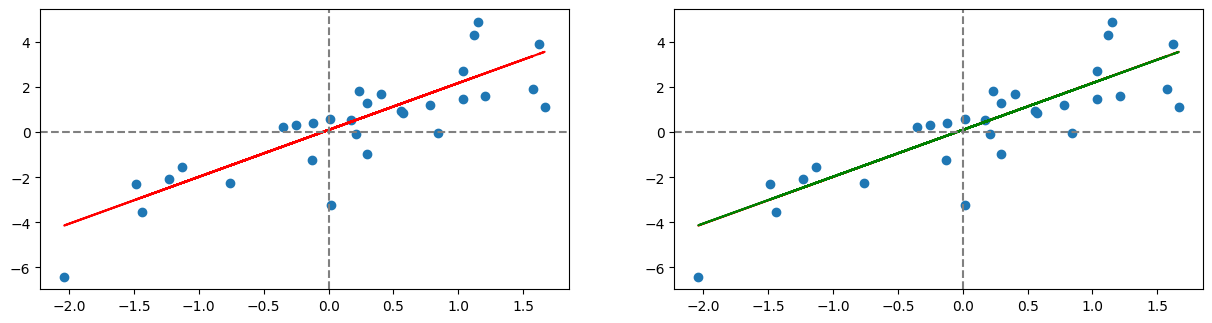

In [80]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(X_test,y_pred_linear, 'r')
plt.scatter(X_test, y_test)
plt.axvline(x=0, color='gray', linestyle='--')  
plt.axhline(y=0, color='gray', linestyle='--') 

plt.subplot(2,2,2)
plt.plot(X_test,y_pred_linear, 'r')
plt.plot(X_test,y_pred_ridge, 'g')
plt.scatter(X_test, y_test)
plt.axvline(x=0, color='gray', linestyle='--')  
plt.axhline(y=0, color='gray', linestyle='--') 

# plt.subplot(2,2,1)
# plt.plot(X_test,y_pred_linear, 'r')
# plt.plot(X_test,y_pred_ridge, 'g')
# plt.scatter(X, y)

In [43]:
def ridge(ramd, X_train, X_test, y_train, y_test):
    model_ridge = Ridge(alpha=ramd)
    kf = KFold(n_splits=10, random_state=1, shuffle=True)

    cross_val_ridge = cross_val_score(model_ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
    
    model_ridge = model_ridge.fit(X_train, y_train)

    y_pred_ridge = model_ridge.predict(X_test)

    mse_val_ridge = np.mean(-cross_val_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)

    return mse_ridge, mse_val_ridge

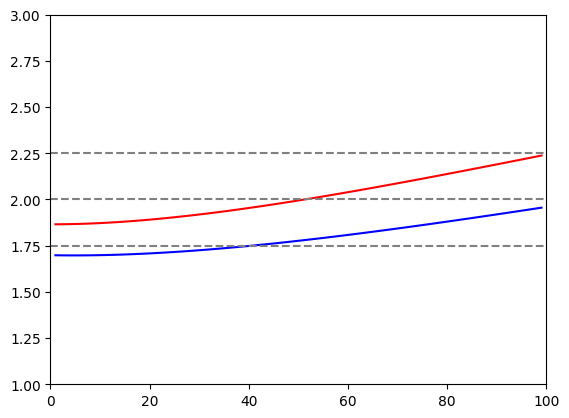

In [78]:
train_plot = []
test_plot = []
ramb = range(1,100,1)

for i in ramb:
    train, test =  ridge(i, X_train, X_test, y_train, y_test)
    train_plot.append(train)
    test_plot.append(test)

plt.plot(ramb, train_plot, '-b')
plt.plot(ramb, test_plot, '-r')

plt.ylim(1, 3)  # Set x-axis range from 0 to 10
plt.xlim(0, 100) 
plt.axhline(y=1.75, color='gray', linestyle='--')
plt.axhline(y=2.00, color='gray', linestyle='--') 
plt.axhline(y=2.25, color='gray', linestyle='--') 